Importing Libraries:

In [22]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



Loading the Dataset:

In [23]:

house_cost = pd.read_csv('datasets_house_prices.csv')

print(house_cost.describe())

       Size (sqft)     Bedrooms          Age  Proximity to Downtown (miles)  \
count  1000.000000  1000.000000  1000.000000                    1000.000000   
mean   2429.857000     2.993000    48.335000                      15.289063   
std     929.914229     1.424423    29.203384                       8.546139   
min     801.000000     1.000000     0.000000                       0.500343   
25%    1629.500000     2.000000    22.000000                       8.475528   
50%    2430.500000     3.000000    47.000000                      15.239628   
75%    3254.250000     4.000000    74.000000                      22.765188   
max    3997.000000     5.000000    99.000000                      29.935715   

              Price  
count  1.000000e+03  
mean   7.190532e+05  
std    2.789818e+05  
min    2.159455e+05  
25%    4.789045e+05  
50%    7.128781e+05  
75%    9.680664e+05  
max    1.212350e+06  


Descriptive Statistics:


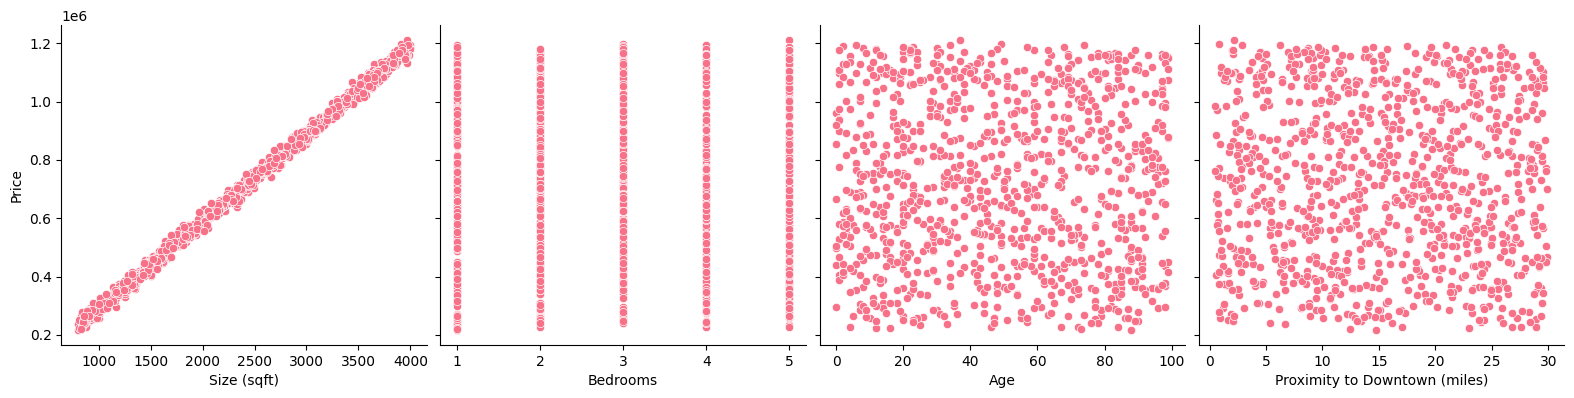

In [24]:
plot_kws = {'color': sns.color_palette('husl', 1)[0]}
sns.pairplot(house_cost, x_vars=['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)'], y_vars='Price', height=4,  plot_kws=plot_kws)
plt.show()

Filling Missing Values:

In [25]:

house_cost.fillna(house_cost.median(), inplace = True)
print(house_cost.isnull().sum())

Size (sqft)                      0
Bedrooms                         0
Age                              0
Proximity to Downtown (miles)    0
Price                            0
dtype: int64


Defining Features and Target Variable:

In [26]:
X = house_cost[['Size (sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)']]
y = house_cost['Price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[ 1.66135285 -1.39986345  1.66725032 -1.5519263 ]
 [-0.82829383  1.40969691  1.35891265  0.98411104]
 [-0.36135059  0.70730682  0.02278273 -1.03593679]
 [-0.53779919 -0.69747336 -0.69667185 -0.83819507]
 [-0.5754559  -1.39986345  0.26260092 -1.1625361 ]]


Splitting the Dataset:


In [27]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


Creating the Linear Regression Model:

In [28]:

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Coefficients", model.coef_)
print("Model Intercept", model.intercept_)


Model Coefficients [278975.28593843   6804.51900082  -6082.93925798  -8459.85395639]
Model Intercept 718607.7680535176


Creating a Series for Feature Importance:

In [29]:

feature_importance = pd.Series(model.coef_, index=['Size(sqft)', 'Bedrooms', 'Age', 'Proximity to Downtown (miles)'])
print(feature_importance.sort_values(ascending = False))

Size(sqft)                       278975.285938
Bedrooms                           6804.519001
Age                               -6082.939258
Proximity to Downtown (miles)     -8459.853956
dtype: float64


Making Predictions:

In [30]:

y_test_pred = model.predict(X_test)

Calculating Mean Squared Error (MSE):

In [31]:

mse = mean_squared_error (y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
adjusted_r2 = 1 -(1-r2)* (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print(f"Test MSE: {mse}")
print(f"Test R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

Test MSE: 100214724.63128743
Test R-squared: 0.9986314443568995
Adjusted R-squared: 0.9986128876702134


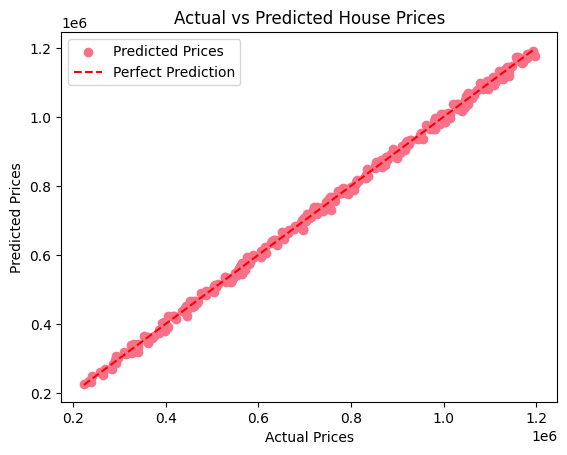

In [32]:
colors = sns.color_palette('husl')
plt.scatter(y_test, y_test_pred, color=colors[0], label="Predicted Prices")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.legend()
plt.show()